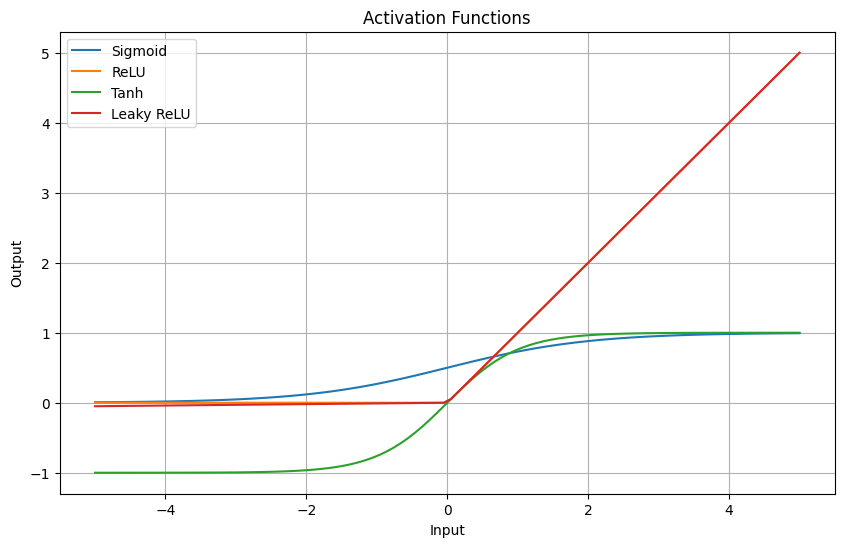

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

x = torch.linspace(-5, 5, 100)

sigmoid = nn.Sigmoid()(x)
relu = nn.ReLU()(x)
tanh = nn.Tanh()(x)
leaky_relu = nn.LeakyReLU(negative_slope=0.01)(x)

plt.figure(figsize=(10, 6))
plt.plot(x.numpy(), sigmoid.numpy(), label='Sigmoid')
plt.plot(x.numpy(), relu.numpy(), label='ReLU')
plt.plot(x.numpy(), tanh.numpy(), label='Tanh')
plt.plot(x.numpy(), leaky_relu.numpy(), label='Leaky ReLU')
plt.title('Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1: Weights tensor([0.4920, 0.8229]), Bias tensor([0.2857])
Epoch 2: Weights tensor([0.3920, 0.7229]), Bias tensor([-0.0143])
Epoch 3: Weights tensor([0.2920, 0.6229]), Bias tensor([-0.2143])
Epoch 4: Weights tensor([0.2920, 0.5229]), Bias tensor([-0.3143])
Epoch 5: Weights tensor([0.2920, 0.4229]), Bias tensor([-0.4143])
Epoch 6: Weights tensor([0.2920, 0.3229]), Bias tensor([-0.5143])
Epoch 7: Weights tensor([0.2920, 0.3229]), Bias tensor([-0.5143])
Epoch 8: Weights tensor([0.2920, 0.3229]), Bias tensor([-0.5143])
Epoch 9: Weights tensor([0.2920, 0.3229]), Bias tensor([-0.5143])
Epoch 10: Weights tensor([0.2920, 0.3229]), Bias tensor([-0.5143])
Predictions:
Input tensor([0., 0.]): Output 0
Input tensor([0., 1.]): Output 0
Input tensor([1., 0.]): Output 0
Input tensor([1., 1.]): Output 1


C:\Users\arunk\AppData\Local\Temp\ipykernel_21820\2087887287.py:43: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  y_plot = -(w1 / w2) * x_plot - b / w2


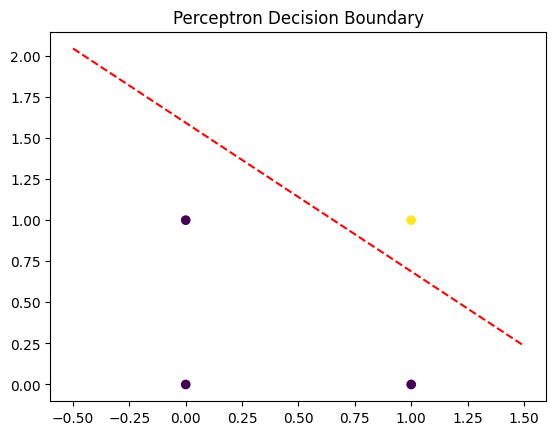

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([0, 0, 0, 1], dtype=torch.float32) 

class Perceptron:
    def __init__(self, input_size):
        self.weights = torch.rand(input_size)
        self.bias = torch.rand(1)
        self.learning_rate = 0.1

    def forward(self, x):
        z = torch.dot(x, self.weights) + self.bias
        return 1 if z > 0 else 0

    def train(self, X, y, epochs=10):
        for epoch in range(epochs):
            for i in range(len(X)):
                pred = self.forward(X[i])
                error = y[i] - pred
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error
            print(f"Epoch {epoch+1}: Weights {self.weights}, Bias {self.bias}")


perc = Perceptron(input_size=2)
perc.train(X, y)

print("Predictions:")
for xi in X:
    print(f"Input {xi}: Output {perc.forward(xi)}")

plt.scatter(X[:,0], X[:,1], c=y)
w1, w2 = perc.weights
b = perc.bias
x_plot = np.linspace(-0.5, 1.5, 100)
y_plot = -(w1 / w2) * x_plot - b / w2
plt.plot(x_plot, y_plot, 'r--')
plt.title('Perceptron Decision Boundary')
plt.show()

In [ ]:
import torch
import numpy as np

X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

class SimpleANN:
    def __init__(self, activation='sigmoid'):
        self.w1 = torch.rand(2, 2, requires_grad=True)  
        self.b1 = torch.rand(2, requires_grad=True)
        self.w2 = torch.rand(2, 1, requires_grad=True)  
        self.b2 = torch.rand(1, requires_grad=True)
        if activation == 'sigmoid':
            self.act = torch.sigmoid
        elif activation == 'relu':
            self.act = torch.relu
        elif activation == 'tanh':
            self.act = torch.tanh
        else:
            raise ValueError("Unsupported activation")

    def forward(self, x):
        hidden = self.act(torch.mm(x, self.w1) + self.b1)
        output = self.act(torch.mm(hidden, self.w2) + self.b2)
        return output

    def train(self, X, y, epochs=1000, lr=0.1):
        for epoch in range(epochs):
            output = self.forward(X)
            loss = ((output - y) ** 2).mean()  # MSE
            loss.backward()
            with torch.no_grad():
                self.w1 -= lr * self.w1.grad
                self.b1 -= lr * self.b1.grad
                self.w2 -= lr * self.w2.grad
                self.b2 -= lr * self.b2.grad
                self.w1.grad.zero_()
                self.b1.grad.zero_()
                self.w2.grad.zero_()
                self.b2.grad.zero_()
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

for act in ['sigmoid', 'relu', 'tanh']:
    print(f"\nTraining with {act} activation:")
    ann = SimpleANN(activation=act)
    ann.train(X, y)
    print("Predictions:")
    print(ann.forward(X))


Training with sigmoid activation:
Epoch 0, Loss: 0.3060
Epoch 100, Loss: 0.2506
Epoch 200, Loss: 0.2498
Epoch 300, Loss: 0.2498
Epoch 400, Loss: 0.2497
Epoch 500, Loss: 0.2497
Epoch 600, Loss: 0.2496
Epoch 700, Loss: 0.2496
Epoch 800, Loss: 0.2495
Epoch 900, Loss: 0.2494
Predictions:
tensor([[0.4859],
        [0.4976],
        [0.5071],
        [0.5158]], grad_fn=<SigmoidBackward0>)

Training with relu activation:
Epoch 0, Loss: 1.2865
Epoch 100, Loss: 0.2502
Epoch 200, Loss: 0.2500
Epoch 300, Loss: 0.2500
Epoch 400, Loss: 0.2500
Epoch 500, Loss: 0.2500
Epoch 600, Loss: 0.2500
Epoch 700, Loss: 0.2500
Epoch 800, Loss: 0.2500
Epoch 900, Loss: 0.2500
Predictions:
tensor([[0.4996],
        [0.5004],
        [0.4996],
        [0.5004]], grad_fn=<ReluBackward0>)

Training with tanh activation:
Epoch 0, Loss: 0.4014
Epoch 100, Loss: 0.2204
Epoch 200, Loss: 0.1916
Epoch 300, Loss: 0.1719
Epoch 400, Loss: 0.1578
Epoch 500, Loss: 0.1498
Epoch 600, Loss: 0.1437
Epoch 700, Loss: 0.1373
Epoch 800,

100%|██████████| 9.91M/9.91M [00:10<00:00, 984kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 88.6kB/s]
100%|██████████| 1.65M/1.65M [00:03<00:00, 456kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.05MB/s]


Epoch 1, Val Acc: 0.9157
Epoch 2, Val Acc: 0.9407
Epoch 3, Val Acc: 0.9599
Epoch 4, Val Acc: 0.9625
Epoch 5, Val Acc: 0.9643
Test Acc: 0.9632
Epoch 1, Val Acc: 0.8530
Epoch 2, Val Acc: 0.8897
Epoch 3, Val Acc: 0.9058
Epoch 4, Val Acc: 0.9120
Epoch 5, Val Acc: 0.9179
Test Acc: 0.9193
Epoch 1, Val Acc: 0.9315
Epoch 2, Val Acc: 0.9497
Epoch 3, Val Acc: 0.9551
Epoch 4, Val Acc: 0.9543
Epoch 5, Val Acc: 0.9673
Test Acc: 0.9682
Epoch 1, Val Acc: 0.9138
Epoch 2, Val Acc: 0.9408
Epoch 3, Val Acc: 0.9491
Epoch 4, Val Acc: 0.9432
Epoch 5, Val Acc: 0.9583
Test Acc: 0.9615
Epoch 1, Val Acc: 0.8252
Epoch 2, Val Acc: 0.8839
Epoch 3, Val Acc: 0.8951
Epoch 4, Val Acc: 0.9046
Epoch 5, Val Acc: 0.9128
Test Acc: 0.9162
Epoch 1, Val Acc: 0.9127
Epoch 2, Val Acc: 0.9414
Epoch 3, Val Acc: 0.9528
Epoch 4, Val Acc: 0.8912
Epoch 5, Val Acc: 0.9387
Test Acc: 0.9395


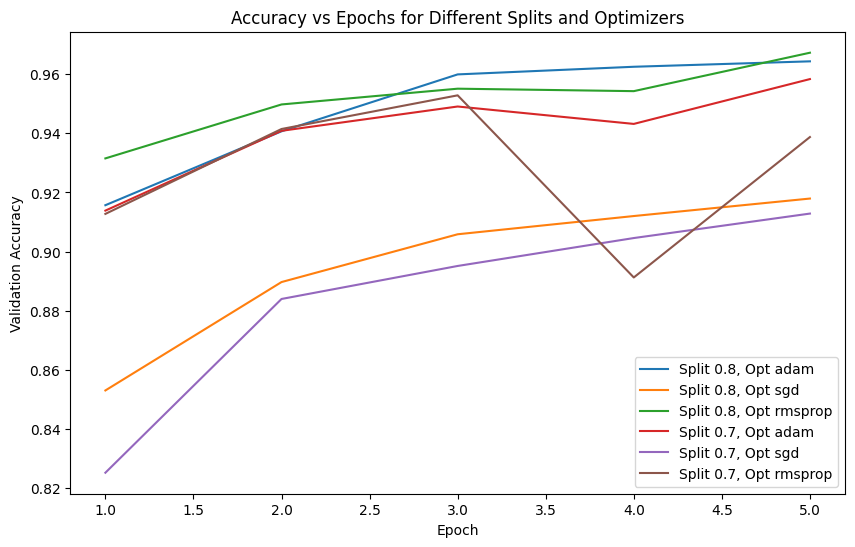

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

def train_and_evaluate(split_ratio, optimizer_name, epochs=5, batch_size=64):
    train_size = int(split_ratio * len(dataset))
    val_size = len(dataset) - train_size
    train_ds, val_ds = random_split(dataset, [train_size, val_size])
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_ds, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    model = MLP()
    criterion = nn.CrossEntropyLoss()
    if optimizer_name == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=0.001)
    elif optimizer_name == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=0.01)
    elif optimizer_name == 'rmsprop':
        optimizer = optim.RMSprop(model.parameters(), lr=0.001)

    accuracies = []
    for epoch in range(epochs):
        model.train()
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

    
        model.eval()
        correct = 0
        with torch.no_grad():
            for data, target in val_loader:
                output = model(data)
                pred = output.argmax(dim=1)
                correct += pred.eq(target).sum().item()
        acc = correct / len(val_ds)
        accuracies.append(acc)
        print(f"Epoch {epoch+1}, Val Acc: {acc:.4f}")

    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            pred = output.argmax(dim=1)
            correct += pred.eq(target).sum().item()
    test_acc = correct / len(test_dataset)
    print(f"Test Acc: {test_acc:.4f}")

    return accuracies

splits = [0.8, 0.7]
optims = ['adam', 'sgd', 'rmsprop']
plt.figure(figsize=(10, 6))
for split in splits:
    for opt in optims:
        accs = train_and_evaluate(split, opt)
        plt.plot(range(1, len(accs)+1), accs, label=f'Split {split}, Opt {opt}')
plt.title('Accuracy vs Epochs for Different Splits and Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
import torch
import torch.nn as nn
import numpy as np


text = "To be, or not to be, that is the question: Whether 'tis nobler in the mind to suffer" * 10 
chars = sorted(list(set(text)))
char_to_idx = {ch: i for i, ch in enumerate(chars)}
idx_to_char = {i: ch for i, ch in enumerate(chars)}
vocab_size = len(chars)


seq_length = 20
X = []
y = []
for i in range(len(text) - seq_length):
    seq_in = text[i:i+seq_length]
    seq_out = text[i+seq_length]
    X.append([char_to_idx[ch] for ch in seq_in])
    y.append(char_to_idx[seq_out])
X = torch.tensor(X, dtype=torch.long)
y = torch.tensor(y, dtype=torch.long)

class CharLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        x = self.embedding(x)
        output, hidden = self.lstm(x, hidden)
        output = self.fc(output[:, -1, :])
        return output, hidden

    def init_hidden(self, batch_size=1):
        return (torch.zeros(1, batch_size, self.hidden_size),
                torch.zeros(1, batch_size, self.hidden_size))

model = CharLSTM(vocab_size, 32, vocab_size)  
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):  
    hidden = model.init_hidden(X.shape[0])
    optimizer.zero_grad()
    output, hidden = model(X, hidden)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

def generate_text(model, start_text, length=100, seq_length=20):
    model.eval()
    hidden = model.init_hidden()
    generated = start_text
    padded_start = start_text.rjust(seq_length)
    input_seq = torch.tensor([char_to_idx.get(ch, 0) for ch in padded_start[-seq_length:]]).unsqueeze(0)
    for _ in range(length):
        output, hidden = model(input_seq, hidden)
        prob = torch.softmax(output, dim=1).detach().numpy()
        next_idx = np.random.choice(range(vocab_size), p=prob[0])
        generated += idx_to_char[next_idx]
        input_seq = torch.tensor([[next_idx]])
    return generated

print(generate_text(model, "To be, or not to be"))

Epoch 0, Loss: 3.1484
Epoch 20, Loss: 1.4553
Epoch 40, Loss: 0.3858
Epoch 60, Loss: 0.0919
Epoch 80, Loss: 0.0357
To be, or not to be, that is the question: Whether 'tis nobler in the s ind to sufferTo be, or snoto beler or n tio not


100%|██████████| 26.4M/26.4M [00:14<00:00, 1.79MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 88.6kB/s]
100%|██████████| 4.42M/4.42M [00:04<00:00, 900kB/s] 
100%|██████████| 5.15k/5.15k [00:00<00:00, 2.18MB/s]


Latent 2, Epoch 1, Loss: 0.1360
Latent 2, Epoch 2, Loss: 0.1186
Latent 2, Epoch 3, Loss: 0.1038
Latent 2, Epoch 4, Loss: 0.1004
Latent 2, Epoch 5, Loss: 0.0965
Latent 2, Epoch 6, Loss: 0.0935
Latent 2, Epoch 7, Loss: 0.0956
Latent 2, Epoch 8, Loss: 0.0872
Latent 2, Epoch 9, Loss: 0.0880
Latent 2, Epoch 10, Loss: 0.0862
Avg Reconstruction Loss: 0.0876


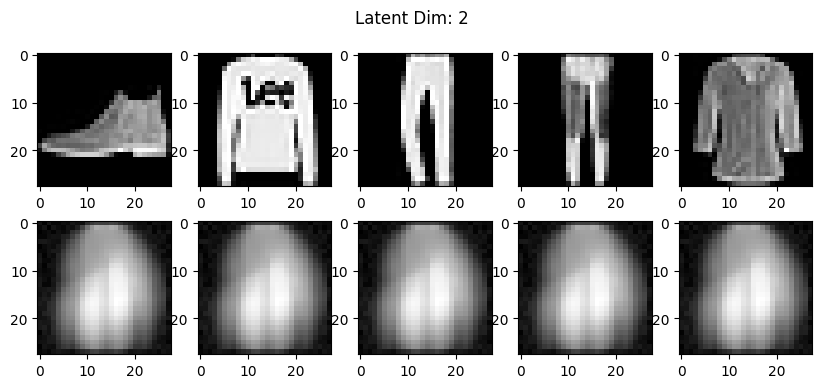

Latent 10, Epoch 1, Loss: 0.0732
Latent 10, Epoch 2, Loss: 0.0443
Latent 10, Epoch 3, Loss: 0.0463
Latent 10, Epoch 4, Loss: 0.0427
Latent 10, Epoch 5, Loss: 0.0420
Latent 10, Epoch 6, Loss: 0.0394
Latent 10, Epoch 7, Loss: 0.0408
Latent 10, Epoch 8, Loss: 0.0380
Latent 10, Epoch 9, Loss: 0.0365
Latent 10, Epoch 10, Loss: 0.0411
Avg Reconstruction Loss: 0.0388


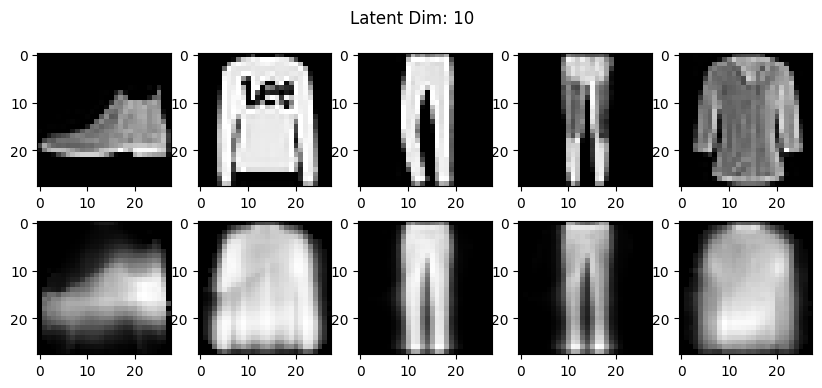

Latent 50, Epoch 1, Loss: 0.0241
Latent 50, Epoch 2, Loss: 0.0181
Latent 50, Epoch 3, Loss: 0.0166
Latent 50, Epoch 4, Loss: 0.0144
Latent 50, Epoch 5, Loss: 0.0119
Latent 50, Epoch 6, Loss: 0.0118
Latent 50, Epoch 7, Loss: 0.0113
Latent 50, Epoch 8, Loss: 0.0112
Latent 50, Epoch 9, Loss: 0.0117
Latent 50, Epoch 10, Loss: 0.0116
Avg Reconstruction Loss: 0.0117


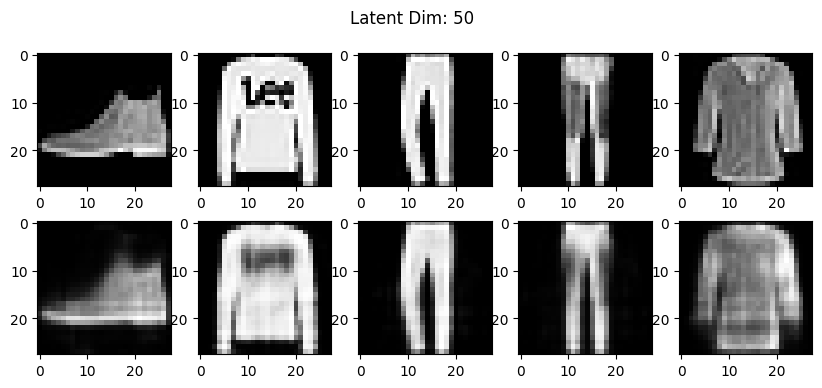

Reconstruction Losses: [0.08761663584015038, 0.03879149677821352, 0.011666088659740701]


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

transform = transforms.ToTensor()
dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
loader = DataLoader(dataset, batch_size=128, shuffle=True)

class Autoencoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, latent_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(-1, 28*28)
        latent = self.encoder(x)
        recon = self.decoder(latent)
        return recon.view(-1, 1, 28, 28)

def train_autoencoder(latent_dim, epochs=10):
    model = Autoencoder(latent_dim)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(epochs):
        for data, _ in loader:
            optimizer.zero_grad()
            recon = model(data)
            loss = criterion(recon, data)
            loss.backward()
            optimizer.step()
        print(f"Latent {latent_dim}, Epoch {epoch+1}, Loss: {loss.item():.4f}")

    test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=128)
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for data, _ in test_loader:
            recon = model(data)
            test_loss += criterion(recon, data).item()
    avg_loss = test_loss / len(test_loader)
    print(f"Avg Reconstruction Loss: {avg_loss:.4f}")

    data, _ = next(iter(test_loader))
    recon = model(data)
    fig, axs = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(5):
        axs[0, i].imshow(data[i].squeeze(), cmap='gray')
        axs[1, i].imshow(recon[i].squeeze().detach(), cmap='gray')
    plt.suptitle(f'Latent Dim: {latent_dim}')
    plt.show()

    return avg_loss

latent_sizes = [2, 10, 50]
losses = [train_autoencoder(dim) for dim in latent_sizes]
print("Reconstruction Losses:", losses)  

100%|██████████| 170M/170M [04:21<00:00, 653kB/s]    


Epoch 1, Loss: 0.0539
Epoch 2, Loss: 0.0483
Epoch 3, Loss: 0.0431
Epoch 4, Loss: 0.0421
Epoch 5, Loss: 0.0418
Epoch 6, Loss: 0.0406
Epoch 7, Loss: 0.0370
Epoch 8, Loss: 0.0394
Epoch 9, Loss: 0.0379
Epoch 10, Loss: 0.0369


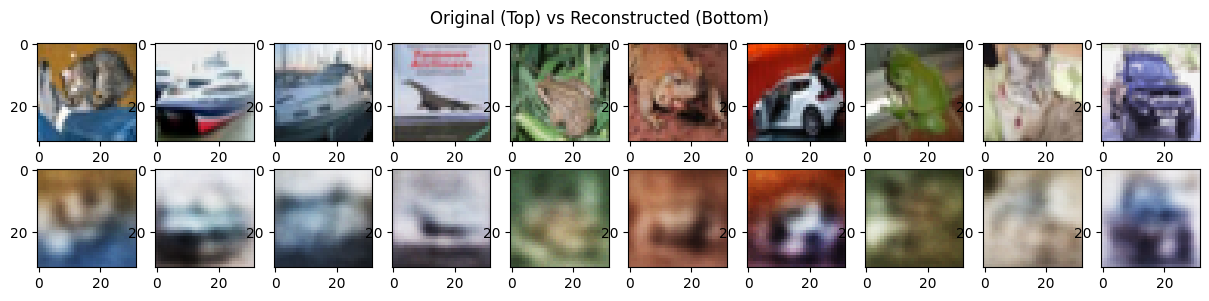

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
loader = DataLoader(dataset, batch_size=128, shuffle=True)

class CIFARAutoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(32*32*3, 128),
            nn.ReLU(),
            nn.Linear(128, 64)
        )
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 32*32*3),
            nn.Tanh() 
        )

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        latent = self.encoder(x)
        recon = self.decoder(latent)
        return recon.view(-1, 3, 32, 32)

model = CIFARAutoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    for data, _ in loader:
        optimizer.zero_grad()
        recon = model(data)
        loss = criterion(recon, data)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=10)
data, _ = next(iter(test_loader))
recon = model(data)
fig, axs = plt.subplots(2, 10, figsize=(15, 3))
for i in range(10):
    axs[0, i].imshow(data[i].permute(1,2,0).numpy() * 0.5 + 0.5)  # Denormalize
    axs[1, i].imshow(recon[i].permute(1,2,0).detach().numpy() * 0.5 + 0.5)
plt.suptitle('Original (Top) vs Reconstructed (Bottom)')
plt.show()

Epoch 1, Acc: 0.8631
Epoch 2, Acc: 0.8668
Epoch 3, Acc: 0.8718
Epoch 4, Acc: 0.8790
Epoch 5, Acc: 0.8787
Epoch 6, Acc: 0.8786
Epoch 7, Acc: 0.8822
Epoch 8, Acc: 0.8905
Epoch 9, Acc: 0.8937
Epoch 10, Acc: 0.8776


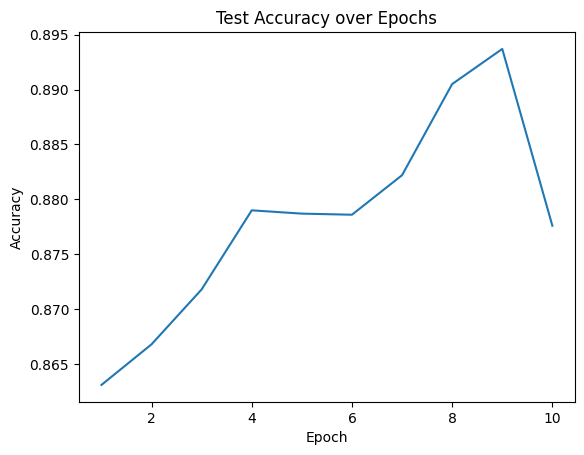

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

transform = transforms.ToTensor()
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128)

class ModernMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        return self.fc3(x)

model = ModernMLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

accuracies = []
for epoch in range(10):
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    model.eval()
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            pred = output.argmax(dim=1)
            correct += pred.eq(target).sum().item()
    acc = correct / len(test_dataset)
    accuracies.append(acc)
    print(f"Epoch {epoch+1}, Acc: {acc:.4f}")

plt.plot(range(1, 11), accuracies)
plt.title('Test Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np

reviews = ["great movie loved it", "bad film waste of time", "awesome plot", "terrible acting"]
labels = [1, 0, 1, 0]  # 1 positive, 0 negative

vocab = list(set(' '.join(reviews).split()))
word_to_idx = {word: i+1 for i, word in enumerate(vocab)}  # 0 for padding
max_len = max(len(r.split()) for r in reviews)
X = np.zeros((len(reviews), max_len))
for i, r in enumerate(reviews):
    words = r.split()
    X[i, :len(words)] = [word_to_idx[w] for w in words]

X = torch.tensor(X, dtype=torch.long)
y = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)

class ReviewDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

loader = DataLoader(ReviewDataset(X, y), batch_size=2, shuffle=True)

class SentimentRNN(nn.Module):
    def __init__(self, vocab_size, embed_size=10, hidden_size=20):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size + 1, embed_size)  # +1 for padding
        self.rnn = nn.RNN(embed_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        output, hidden = self.rnn(x)
        return self.sigmoid(self.fc(hidden.squeeze(0)))

model = SentimentRNN(len(vocab))
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(50):
    for data, target in loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

test_review = torch.tensor([[word_to_idx.get(w, 0) for w in "great film".split()] + [0]*(max_len-2)])
print("Prediction for 'great film':", model(test_review).item())
# In practice, load CSV with pandas: df = pd.read_csv('imdb_reviews.csv'); process text to X.

Epoch 0, Loss: 0.6456
Epoch 10, Loss: 0.1397
Epoch 20, Loss: 0.0090
Epoch 30, Loss: 0.0045
Epoch 40, Loss: 0.0030
Prediction for 'great film': 0.9889856576919556


Basic AE on Fashion MNIST
Epoch 1, Loss: 0.0330
Epoch 2, Loss: 0.0216
Epoch 3, Loss: 0.0188
Epoch 4, Loss: 0.0160
Epoch 5, Loss: 0.0188


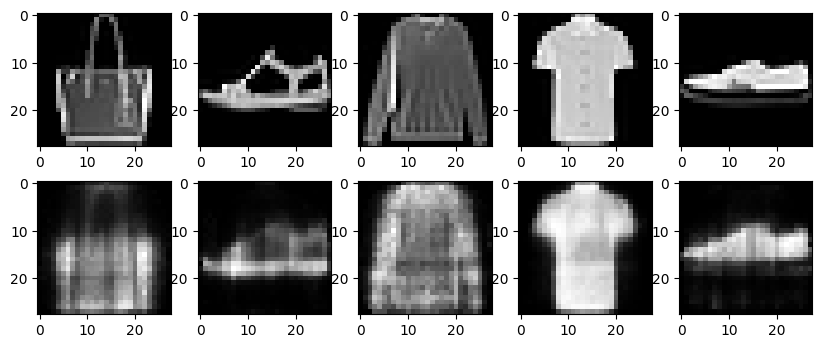

Denoising AE on Fashion MNIST
Epoch 1, Loss: 0.0281
Epoch 2, Loss: 0.0226
Epoch 3, Loss: 0.0183
Epoch 4, Loss: 0.0179
Epoch 5, Loss: 0.0185


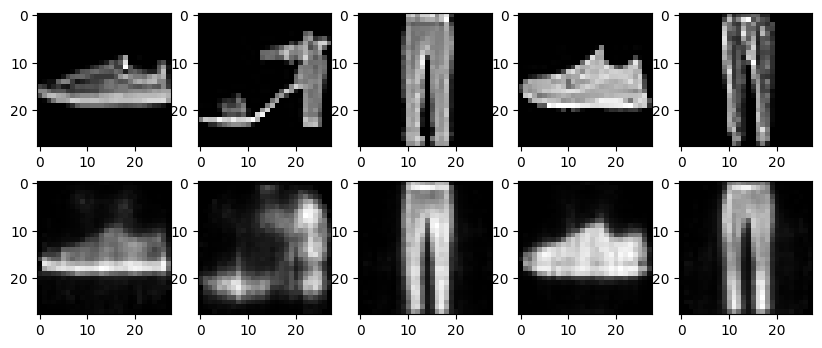

VAE on Fashion MNIST
Epoch 1, Loss: 25890.8398
Epoch 2, Loss: 24253.7266
Epoch 3, Loss: 26137.5312
Epoch 4, Loss: 24600.5723
Epoch 5, Loss: 24673.6074


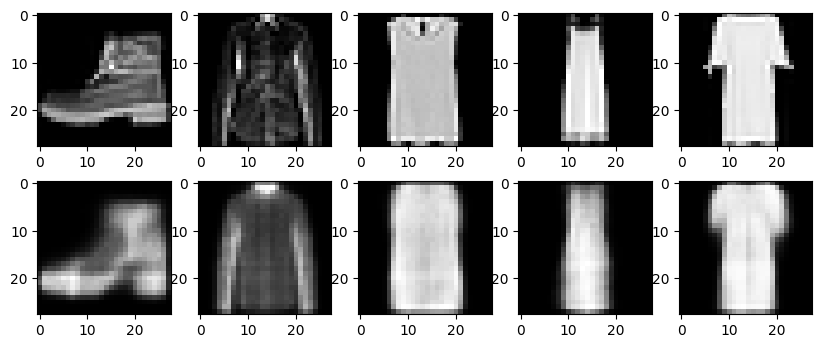

Basic AE on CIFAR-10
Epoch 1, Loss: 0.0635
Epoch 2, Loss: 0.0601
Epoch 3, Loss: 0.0650
Epoch 4, Loss: 0.0615
Epoch 5, Loss: 0.0608


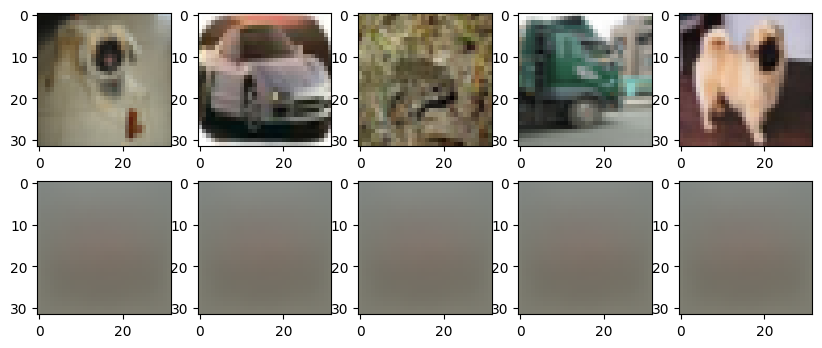

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

transform = transforms.ToTensor()
fm_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
cifar_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
fm_loader = DataLoader(fm_dataset, batch_size=128, shuffle=True)
cifar_loader = DataLoader(cifar_dataset, batch_size=128, shuffle=True)

class BasicAE(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.input_dim = input_dim  
        self.encoder = nn.Linear(input_dim, 32)
        self.decoder = nn.Linear(32, input_dim)

    def forward(self, x):
        flat = x.view(-1, self.input_dim)  
        latent = torch.relu(self.encoder(flat))
        recon = torch.sigmoid(self.decoder(latent))
        return recon.view(x.shape)

class DenoisingAE(BasicAE):
    def __init__(self, input_dim):
        super().__init__(input_dim)  

    def forward(self, x):
        noisy = x + 0.2 * torch.randn_like(x)
        return super().forward(noisy)

class VAE(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.input_dim = input_dim  
        self.fc1 = nn.Linear(input_dim, 128)
        self.mu = nn.Linear(128, 32)
        self.logvar = nn.Linear(128, 32)
        self.decoder = nn.Sequential(nn.Linear(32, 128), nn.ReLU(), nn.Linear(128, input_dim), nn.Sigmoid())

    def encode(self, x):
        h = torch.relu(self.fc1(x.view(-1, self.input_dim)))
        return self.mu(h), self.logvar(h)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decoder(z).view(x.shape), mu, logvar

def vae_loss(recon, x, mu, logvar):
    recon_loss = nn.functional.binary_cross_entropy(recon, x, reduction='sum')
    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + kl_loss

def train_ae(model, loader, epochs=5, is_vae=False):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    for epoch in range(epochs):
        for data, _ in loader:
            optimizer.zero_grad()
            if is_vae:
                recon, mu, logvar = model(data)
                loss = vae_loss(recon, data, mu, logvar)
            else:
                recon = model(data)
                loss = nn.MSELoss()(recon, data)
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

   
    data, _ = next(iter(loader))
    if is_vae:
        recon, _, _ = model(data)
    else:
        recon = model(data)
    fig, axs = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(5):
        axs[0, i].imshow(data[i].permute(1,2,0).squeeze(), cmap='gray' if data.shape[1]==1 else None)
        axs[1, i].imshow(recon[i].permute(1,2,0).detach().squeeze(), cmap='gray' if data.shape[1]==1 else None)
    plt.show()

print("Basic AE on Fashion MNIST")
train_ae(BasicAE(28*28), fm_loader)
print("Denoising AE on Fashion MNIST")
train_ae(DenoisingAE(28*28), fm_loader)
print("VAE on Fashion MNIST")
train_ae(VAE(28*28), fm_loader, is_vae=True)

print("Basic AE on CIFAR-10")
train_ae(BasicAE(32*32*3), cifar_loader)